<a href="https://colab.research.google.com/github/p-ranchal/Cat-Dog-Detector/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Kaggle Credentials

In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [36]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# ! kaggle datasets list

#Download Dataset

In [ ]:
! kaggle datasets download -d tongpython/cat-and-dog

 99% 216M/218M [00:08<00:00, 28.7MB/s]
100% 218M/218M [00:08<00:00, 27.4MB/s]


In [ ]:
!unzip cat-and-dog.zip

#Import Dependencies

In [37]:
import tensorflow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [45]:
import matplotlib.pyplot as plt

#Model Architecture

In [38]:
model = Sequential()

model.add(Conv2D(256, kernel_size=(3, 3), activation="relu", input_shape=(224, 224, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation = "relu"))
model.add(BatchNormalization())
# model.add(Dropout(0.5))

model.add(Dense(64, activation = "relu"))
model.add(BatchNormalization())
# model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))


# Set a learning rate
learning_rate = 0.1

# Create the optimizer with the desired learning rate
adam_optimizer = Adam(learning_rate=learning_rate)

model.compile(loss="binary_crossentropy", optimizer=adam_optimizer, metrics=["accuracy"])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 256)     7168      
                                                                 
 batch_normalization_20 (Ba  (None, 222, 222, 256)     1024      
 tchNormalization)                                               
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 111, 111, 256)     0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 109, 109, 64)      147520    
                                                                 
 batch_normalization_21 (Ba  (None, 109, 109, 64)      256       
 tchNormalization)                                               
                                                      

#Setup Data for Training & Validation

In [39]:
train_datagen = image.ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = image.ImageDataGenerator(rescale = 1./255)

In [40]:
train_generator = train_datagen.flow_from_directory('training_set/training_set/', target_size=(224, 224), batch_size=32, class_mode="binary")
val_generator = test_datagen.flow_from_directory('test_set/test_set/', target_size=(224, 224), batch_size=32, class_mode="binary")

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


#Train Model

In [41]:
hist = model.fit(train_generator, epochs=10, validation_data=val_generator)

Epoch 1/10
251/251 [==============================] - 99s 382ms/step - loss: 0.7191 - accuracy: 0.5438 - val_loss: 0.8597 - val_accuracy: 0.5353
Epoch 2/10
251/251 [==============================] - 94s 374ms/step - loss: 0.6732 - accuracy: 0.5874 - val_loss: 0.7977 - val_accuracy: 0.6001
Epoch 3/10
251/251 [==============================] - 94s 376ms/step - loss: 0.6825 - accuracy: 0.5869 - val_loss: 0.7892 - val_accuracy: 0.6204
Epoch 4/10
251/251 [==============================] - 94s 373ms/step - loss: 0.6562 - accuracy: 0.6155 - val_loss: 3.1412 - val_accuracy: 0.6060
Epoch 5/10
251/251 [==============================] - 93s 372ms/step - loss: 0.6401 - accuracy: 0.6427 - val_loss: 0.6476 - val_accuracy: 0.6144
Epoch 6/10
251/251 [==============================] - 94s 372ms/step - loss: 0.6007 - accuracy: 0.6763 - val_loss: 0.8178 - val_accuracy: 0.5724
Epoch 7/10
251/251 [==============================] - 95s 378ms/step - loss: 0.5961 - accuracy: 0.6881 - val_loss: 0.6234 - val_ac

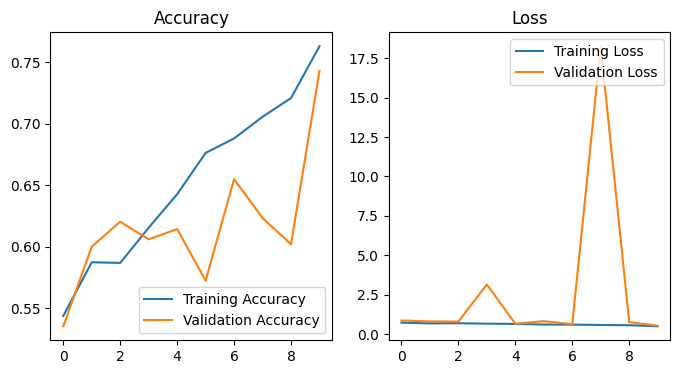

In [48]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

#Reset Model Architecture

In [42]:
model = Sequential()

model.add(Conv2D(256, kernel_size=(3, 3), activation="relu", input_shape=(224, 224, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation = "relu"))
model.add(BatchNormalization())
# model.add(Dropout(0.5))

model.add(Dense(64, activation = "relu"))
model.add(BatchNormalization())
# model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))


# Set a learning rate
learning_rate = 0.1

# Create the optimizer with the desired learning rate
adam_optimizer = Adam(learning_rate=learning_rate)

model.compile(loss="binary_crossentropy", optimizer=adam_optimizer, metrics=["accuracy"])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 222, 222, 256)     7168      
                                                                 
 batch_normalization_25 (Ba  (None, 222, 222, 256)     1024      
 tchNormalization)                                               
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 111, 111, 256)     0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 109, 109, 64)      147520    
                                                                 
 batch_normalization_26 (Ba  (None, 109, 109, 64)      256       
 tchNormalization)                                               
                                                      

In [43]:
hist2 = model.fit(train_generator, epochs=20, validation_data=val_generator)

Epoch 1/20
251/251 [==============================] - 98s 376ms/step - loss: 0.7126 - accuracy: 0.5410 - val_loss: 0.7542 - val_accuracy: 0.5818
Epoch 2/20
251/251 [==============================] - 95s 379ms/step - loss: 0.6747 - accuracy: 0.5896 - val_loss: 2.2061 - val_accuracy: 0.5042
Epoch 3/20
251/251 [==============================] - 94s 374ms/step - loss: 0.6447 - accuracy: 0.6332 - val_loss: 0.6541 - val_accuracy: 0.6312
Epoch 4/20
251/251 [==============================] - 93s 370ms/step - loss: 0.6527 - accuracy: 0.6230 - val_loss: 1.1251 - val_accuracy: 0.5047
Epoch 5/20
251/251 [==============================] - 94s 376ms/step - loss: 0.6205 - accuracy: 0.6606 - val_loss: 0.6068 - val_accuracy: 0.6560
Epoch 6/20
251/251 [==============================] - 94s 372ms/step - loss: 0.6140 - accuracy: 0.6662 - val_loss: 1.7158 - val_accuracy: 0.5255
Epoch 7/20
251/251 [==============================] - 93s 370ms/step - loss: 0.5858 - accuracy: 0.6996 - val_loss: 0.5965 - val_ac

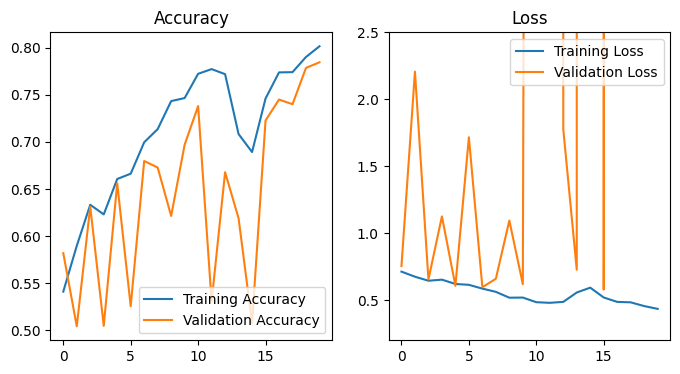

In [59]:
acc = hist2.history['accuracy']
val_acc = hist2.history['val_accuracy']

loss = hist2.history['loss']
val_loss = hist2.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.ylim(0.20, 2.50)
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()